Epoch 1/5
313/313 [==============================] - 77s 243ms/step - loss: 0.4568 - accuracy: 0.7792 - val_loss: 0.3296 - val_accuracy: 0.8704
Epoch 2/5
313/313 [==============================] - 86s 274ms/step - loss: 0.2601 - accuracy: 0.8984 - val_loss: 0.3053 - val_accuracy: 0.8714
Epoch 3/5
313/313 [==============================] - 84s 269ms/step - loss: 0.1699 - accuracy: 0.9380 - val_loss: 0.3501 - val_accuracy: 0.8706
Epoch 4/5
313/313 [==============================] - 84s 269ms/step - loss: 0.1306 - accuracy: 0.9532 - val_loss: 0.4115 - val_accuracy: 0.8404
Epoch 5/5
313/313 [==============================] - 86s 276ms/step - loss: 0.0924 - accuracy: 0.9683 - val_loss: 0.4704 - val_accuracy: 0.8504
Epoch 1/5
313/313 [==============================] - 57s 179ms/step - loss: 0.4549 - accuracy: 0.7727 - val_loss: 0.4611 - val_accuracy: 0.7898
Epoch 2/5
313/313 [==============================] - 57s 183ms/step - loss: 0.2602 - accuracy: 0.8963 - val_loss: 0.3129 - val_accuracy:

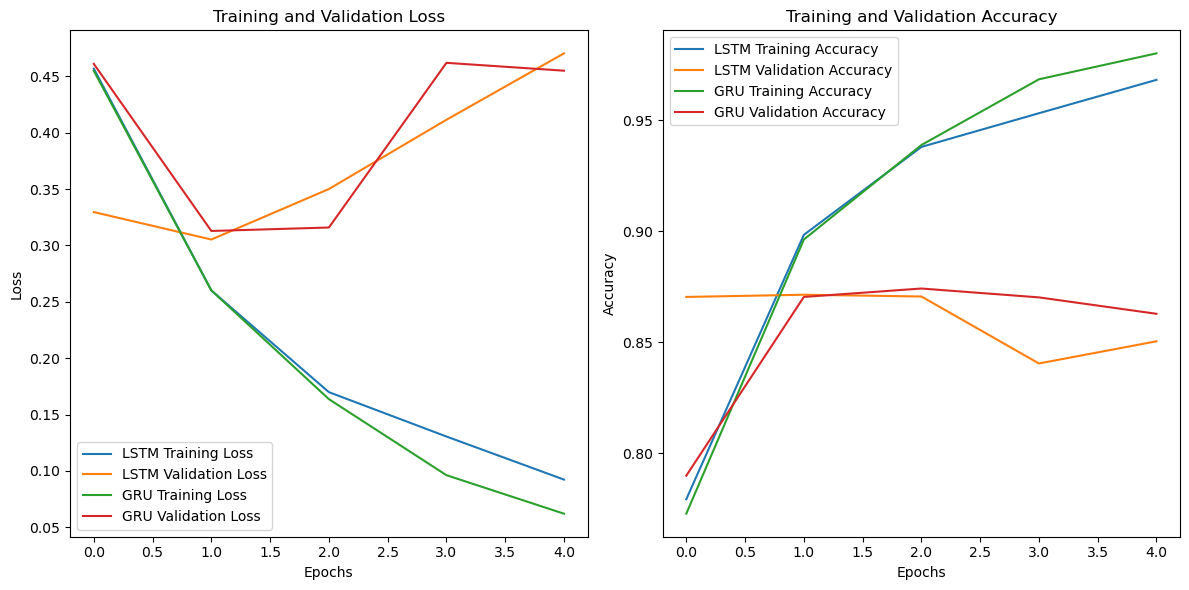

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense

num_words = 10000
max_length = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))
gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)
gru_history = gru_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)

lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test)
gru_loss, gru_acc = gru_model.evaluate(X_test, y_test)

print(f"LSTM Model Accuracy: {round(lstm_acc * 100, 2)}%\nGRU Model Accuracy: {round(gru_acc * 100, 2)}%")

# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()